# Analysis of visitor numbers in Upper Bavaria during the Oktoberfest

In [507]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
from tueplots import bundles
from tueplots.constants.color import rgb
import geopandas
import folium

### Load and clean the dataset for the number of people visiting in September

The data in Table [45511-002](https://www.statistikdaten.bayern.de/genesis//online?operation=table&code=45511-002&bypass=true&levelindex=1&levelid=1705932882341#abreadcrumb) is sourced from the Bavarian State Statistical Office. It displays the number of guest arrivals and overnight stays per month, categorized by the origin of guests (domestic/foreign), for the municipalities in Bavaria (including non-municipal areas) from 2006 to 2023.
 
All available visitor data for the month of September was downloaded, as the Oktoberfest begins in mid-September. The data for the previous month and the following month were also downloaded.

In [508]:
directory = "venv/data/tourism_september"
column_names = ["Code", "Gemeinde", "Gästeankünfte_insgesamt", "Gästeübernachtungen_insgesamt", "Gästeankünfte_Inland", "Gästeübernachtungen_Inland", "Gästeankünfte_Ausland", "Gästeübernachtungen_Ausland"]
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["September"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_september = pd.concat(results, axis=0, ignore_index=True)
tourism_september

,Code,Gemeinde,Gästeankünfte_insgesamt,Gästeübernachtungen_insgesamt,Gästeankünfte_Inland,Gästeübernachtungen_Inland,Gästeankünfte_Ausland,Gästeübernachtungen_Ausland,Monat,Jahr
0,9,Bayern,2810218,8153398,2185030,6905019,625188,1248379,September,2006
1,91,Oberbayern,1230363,3257505,857670,2486440,372693,771065,September,2006
2,9161,Ingolstadt (Krfr.St),21303,36684,15117,26261,6186,10423,September,2006
3,9162,"München, Landeshauptstadt",465880,935260,240027,452646,225853,482614,September,2006
4,9163,Rosenheim (Krfr.St),11000,16087,7131,10360,3869,5727,September,2006
...,...,...,...,...,...,...,...,...,...,...
39199,9780144,"Weitnau, M",1051,3606,679,2358,372,1248,September,2023
39200,9780145,"Wertach, M",4830,16492,4732,16186,98,306,September,2023
39201,9780146,"Wiggensbach, M",937,2631,888,2530,49,101,September,2023
39202,9780147,Wildpoldsried,.,.,.,.,.,.,September,2023


In [509]:
tourism_september.replace('-', np.nan, inplace=True)
tourism_september.replace('.', np.nan, inplace=True)

# define data types for the columns of the dataframe
convert_dict = {column: pd.Float64Dtype() if column not in ['Gemeinde'] else pd.StringDtype() for column in column_names}
convert_dict.update({'Monat': pd.StringDtype(), 'Jahr': pd.Int32Dtype()})
tourism_september = tourism_september.astype(convert_dict)

tourism_september.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39204 entries, 0 to 39203
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           39204 non-null  Float64
 1   Gemeinde                       39204 non-null  string 
 2   Gästeankünfte_insgesamt        17611 non-null  Float64
 3   Gästeübernachtungen_insgesamt  17611 non-null  Float64
 4   Gästeankünfte_Inland           17610 non-null  Float64
 5   Gästeübernachtungen_Inland     17611 non-null  Float64
 6   Gästeankünfte_Ausland          16697 non-null  Float64
 7   Gästeübernachtungen_Ausland    16720 non-null  Float64
 8   Monat                          39204 non-null  string 
 9   Jahr                           39204 non-null  Int32  
dtypes: Float64(7), Int32(1), string(2)
memory usage: 3.1 MB


### Load and clean the dataset for the number of people visiting in August

In [510]:
directory= "venv/data/tourism_august"
results =[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["August"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_august = pd.concat(results, axis=0, ignore_index=True)
tourism_august

,Code,Gemeinde,Gästeankünfte_insgesamt,Gästeübernachtungen_insgesamt,Gästeankünfte_Inland,Gästeübernachtungen_Inland,Gästeankünfte_Ausland,Gästeübernachtungen_Ausland,Monat,Jahr
0,9,Bayern,2595997,8935372,1916136,7438994,679861,1496378,August,2006
1,91,Oberbayern,1082430,3462729,739585,2686157,342845,776572,August,2006
2,9161,Ingolstadt (Krfr.St),20961,36487,12131,23914,8830,12573,August,2006
3,9162,"München, Landeshauptstadt",401172,872431,202227,414698,198945,457733,August,2006
4,9163,Rosenheim (Krfr.St),9294,13334,5745,8826,3549,4508,August,2006
...,...,...,...,...,...,...,...,...,...,...
39199,9780144,"Weitnau, M",1036,3953,653,2550,383,1403,August,2023
39200,9780145,"Wertach, M",4400,21363,4168,20339,232,1024,August,2023
39201,9780146,"Wiggensbach, M",610,1358,551,1280,59,78,August,2023
39202,9780147,Wildpoldsried,.,.,.,.,.,.,August,2023


In [511]:
tourism_august.replace('-', np.nan, inplace=True)
tourism_august.replace('.', np.nan, inplace=True)
tourism_august = tourism_august.astype(convert_dict)

tourism_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39204 entries, 0 to 39203
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           39204 non-null  Float64
 1   Gemeinde                       39204 non-null  string 
 2   Gästeankünfte_insgesamt        17568 non-null  Float64
 3   Gästeübernachtungen_insgesamt  17568 non-null  Float64
 4   Gästeankünfte_Inland           17568 non-null  Float64
 5   Gästeübernachtungen_Inland     17568 non-null  Float64
 6   Gästeankünfte_Ausland          16805 non-null  Float64
 7   Gästeübernachtungen_Ausland    16824 non-null  Float64
 8   Monat                          39204 non-null  string 
 9   Jahr                           39204 non-null  Int32  
dtypes: Float64(7), Int32(1), string(2)
memory usage: 3.1 MB


### Load and clean the dataset for the number of people visiting in October

In [512]:
directory= "venv/data/tourism_october"
results =[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["Oktober"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_october = pd.concat(results, axis=0, ignore_index=True)
tourism_october

,Code,Gemeinde,Gästeankünfte_insgesamt,Gästeübernachtungen_insgesamt,Gästeankünfte_Inland,Gästeübernachtungen_Inland,Gästeankünfte_Ausland,Gästeübernachtungen_Ausland,Monat,Jahr
0,9,Bayern,2387869,6835103,1924392,5871652,463477,963451,Oktober,2006
1,91,Oberbayern,1029281,2666407,757292,2086967,271989,579440,Oktober,2006
2,9161,Ingolstadt (Krfr.St),18561,33382,14401,25489,4160,7893,Oktober,2006
3,9162,"München, Landeshauptstadt",426656,861666,254826,492981,171830,368685,Oktober,2006
4,9163,Rosenheim (Krfr.St),6501,9907,4735,7115,1766,2792,Oktober,2006
...,...,...,...,...,...,...,...,...,...,...
37021,9780144,"Weitnau, M",861,2987,568,2001,293,986,Oktober,2022
37022,9780145,"Wertach, M",1952,11148,1917,11033,35,115,Oktober,2022
37023,9780146,"Wiggensbach, M",833,2223,776,2116,57,107,Oktober,2022
37024,9780147,Wildpoldsried,.,.,.,.,.,.,Oktober,2022


In [513]:
tourism_october.replace('-', np.nan, inplace=True)
tourism_october.replace('.', np.nan, inplace=True)
tourism_october = tourism_october.astype(convert_dict)

tourism_october.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37026 entries, 0 to 37025
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           37026 non-null  Float64
 1   Gemeinde                       37026 non-null  string 
 2   Gästeankünfte_insgesamt        16506 non-null  Float64
 3   Gästeübernachtungen_insgesamt  16506 non-null  Float64
 4   Gästeankünfte_Inland           16506 non-null  Float64
 5   Gästeübernachtungen_Inland     16506 non-null  Float64
 6   Gästeankünfte_Ausland          15337 non-null  Float64
 7   Gästeübernachtungen_Ausland    15361 non-null  Float64
 8   Monat                          37026 non-null  string 
 9   Jahr                           37026 non-null  Int32  
dtypes: Float64(7), Int32(1), string(2)
memory usage: 3.0 MB


### Visualize the number of overnight stays and guest arrivals in the months of August, September and October in the district of Munich

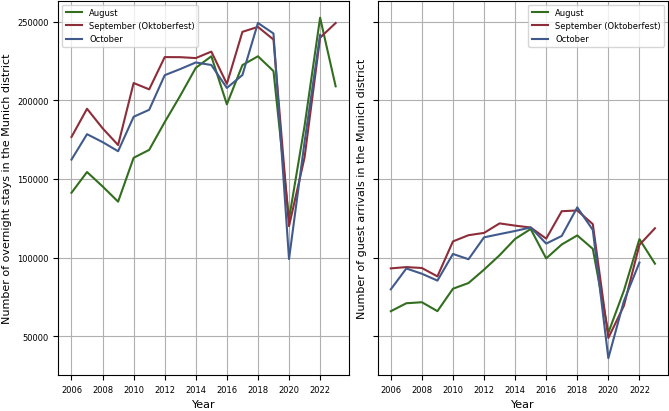

In [514]:
munich_august = tourism_august[tourism_august["Code"] == 9184]
munich_september = tourism_september[tourism_september["Code"] == 9184]
munich_october = tourism_october[tourism_october["Code"] == 9184]

plt.rcParams.update(bundles.icml2022(family="sans-serif",column="full", nrows=2, ncols=2, usetex=False))
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].plot(munich_august['Jahr'], munich_august['Gästeübernachtungen_insgesamt'], color=rgb.tue_darkgreen, label='August')
axs[0].plot(munich_september['Jahr'], munich_september['Gästeübernachtungen_insgesamt'], color=rgb.tue_red, label='September (Oktoberfest)')
axs[0].plot(munich_october['Jahr'], munich_october['Gästeübernachtungen_insgesamt'], color=rgb.tue_darkblue, label='October')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of overnight stays in the Munich district')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[0].grid(True)
axs[0].legend()

axs[1].plot(munich_august['Jahr'], munich_august['Gästeankünfte_insgesamt'], color=rgb.tue_darkgreen, label='August')
axs[1].plot(munich_september['Jahr'], munich_september['Gästeankünfte_insgesamt'], color=rgb.tue_red, label='September (Oktoberfest)')
axs[1].plot(munich_october['Jahr'], munich_october['Gästeankünfte_insgesamt'], color=rgb.tue_darkblue, label='October')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of guest arrivals in the Munich district')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[1].grid(True)
axs[1].legend()

plt.show()

The district of Munich experiences a higher number of guest arrivals and overnight stays in September, which coincides with the Oktoberfest, compared to the preceding and following months. As daily visitor numbers are unavailable, the monthly breakdown provides the most detailed information available. Therefore, it has to be assumed that the majority of visitors to the Oktoberfest are included in the visitor numbers for September, especially the arrival figures, as the Oktoberfest starts in mid-September and most visitors are likely to arrive during this month.

### Load the Oktoberfest dataset and visualize the number of visitors per year

In [515]:
oktoberfest = pd.read_csv("venv/data/Oktoberfest.csv")
oktoberfest.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


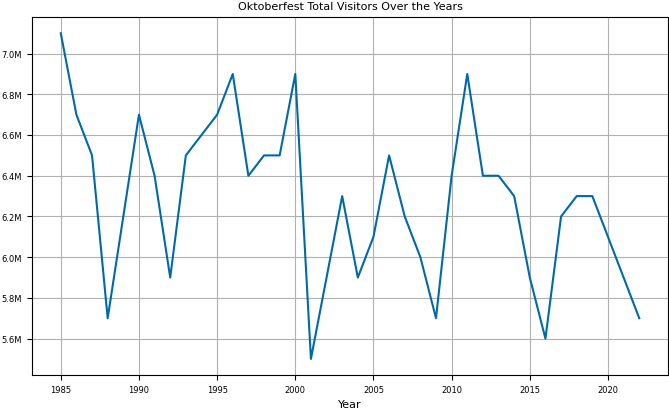

In [516]:
ax = oktoberfest.plot(kind="line", x="jahr", y="besucher_gesamt", color=rgb.tue_blue, legend=None)
plt.xlabel("Year")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}M'))
plt.title("Oktoberfest Total Visitors Over the Years")
plt.grid(True)
plt.show()

When comparing the number of visitors to the Oktoberfest with the tourism figures for September, a significant discrepancy is evident. In September 2016, the district of Munich had 112,175 guest arrivals, while the number of visitors to the Oktoberfest was 5.6 million. Although the majority of visitors may come from Munich, it is important to consider that some may be accommodated elsewhere. We assumed that due to the high prices in Munich, visitors to the Oktoberfest may choose to stay in neighbouring districts. To analyse this thesis, we will create a heat map showing the number of Oktoberfest visitors in the districts surrounding Munich (i.e. the districts in Upper Bavaria).

### To create our heat map, we must establish a method for determining the number of visitors to a district who also visit the Oktoberfest. One possible approach is to calculate the average number of visitors for the preceding month (August) and the following month (October) to estimate the expected number of visitors without the influence of the Oktoberfest. We can then subtract the expected number from the actual number of visitors to determine the number of visitors to the Oktoberfest.

In [517]:
tourism_september['Erwartete_Anzahl_an_Gästeankünften'] = np.nan
oberbayern_counties = []

for code in [9161,9162,9163,9171,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190]:
    oberbayern_counties.append(tourism_august.loc[(tourism_august['Code'] == code) & (tourism_august['Jahr'] == 2006)]['Gemeinde'].iloc[0].strip())
    for year in range(2006, 2024):
        overnight_stays_october = tourism_october.loc[(tourism_october['Code'] == code) & (tourism_october['Jahr'] == year)]['Gästeankünfte_insgesamt']
        overnight_stays_august = tourism_august.loc[(tourism_august['Code'] == code) & (tourism_august['Jahr'] == year)]['Gästeankünfte_insgesamt']
        desired_index = tourism_september[(tourism_september['Code'] == code) & (tourism_september['Jahr'] == year)].index
        tourism_september.loc[desired_index, 'Erwartete_Anzahl_an_Gästeankünften'] = (overnight_stays_august + overnight_stays_october)/2
        
tourism_september

,Code,Gemeinde,Gästeankünfte_insgesamt,Gästeübernachtungen_insgesamt,Gästeankünfte_Inland,Gästeübernachtungen_Inland,Gästeankünfte_Ausland,Gästeübernachtungen_Ausland,Monat,Jahr,Erwartete_Anzahl_an_Gästeankünften
0,9.0,Bayern,2810218.0,8153398.0,2185030.0,6905019.0,625188.0,1248379.0,September,2006,<NA>
1,91.0,Oberbayern,1230363.0,3257505.0,857670.0,2486440.0,372693.0,771065.0,September,2006,<NA>
2,9161.0,Ingolstadt (Krfr.St),21303.0,36684.0,15117.0,26261.0,6186.0,10423.0,September,2006,19761.0
3,9162.0,"München, Landeshauptstadt",465880.0,935260.0,240027.0,452646.0,225853.0,482614.0,September,2006,413914.0
4,9163.0,Rosenheim (Krfr.St),11000.0,16087.0,7131.0,10360.0,3869.0,5727.0,September,2006,7897.5
...,...,...,...,...,...,...,...,...,...,...,...
39199,9780144.0,"Weitnau, M",1051.0,3606.0,679.0,2358.0,372.0,1248.0,September,2023,<NA>
39200,9780145.0,"Wertach, M",4830.0,16492.0,4732.0,16186.0,98.0,306.0,September,2023,<NA>
39201,9780146.0,"Wiggensbach, M",937.0,2631.0,888.0,2530.0,49.0,101.0,September,2023,<NA>
39202,9780147.0,Wildpoldsried,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,September,2023,<NA>


### Take a look at the expected vs actual number of guest arrivals in the district of Munich (9184) and Ebersberg (9175), a smaller district which borders on Munich

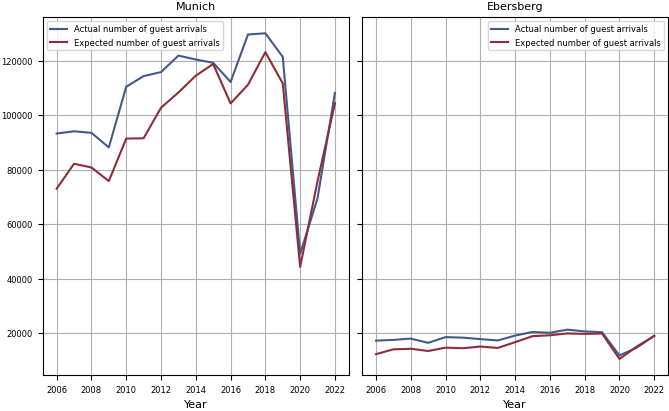

In [518]:
munich_example = tourism_september.loc[tourism_september['Code'] == 9184]
munich_example = munich_example[['Jahr', 'Gästeankünfte_insgesamt', 'Erwartete_Anzahl_an_Gästeankünften']].dropna()
ebersberg_example = tourism_september.loc[tourism_september['Code'] == 9175]
ebersberg_example = ebersberg_example[['Jahr', 'Gästeankünfte_insgesamt', 'Erwartete_Anzahl_an_Gästeankünften']].dropna()

fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].plot(munich_example['Jahr'], munich_example['Gästeankünfte_insgesamt'], label='Actual number of guest arrivals', color=rgb.tue_darkblue)
axs[0].plot(munich_example['Jahr'], munich_example['Erwartete_Anzahl_an_Gästeankünften'], label='Expected number of guest arrivals', color=rgb.tue_red)
axs[0].set_xlabel('Year')
axs[0].set_title('Munich')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(ebersberg_example['Jahr'], ebersberg_example['Gästeankünfte_insgesamt'], label='Actual number of guest arrivals', color=rgb.tue_darkblue)
axs[1].plot(ebersberg_example['Jahr'], ebersberg_example['Erwartete_Anzahl_an_Gästeankünften'], label='Expected number of guest arrivals', color=rgb.tue_red)
axs[1].set_xlabel('Year')
axs[1].set_title('Ebersberg')
axs[1].grid(True)
axs[1].legend()
plt.show()

In the districts surrounding Munich, there are smaller but still noticeable deviations between the observed and actual number of guest arrivals. The number of guest arrivals is consistently higher than expected, indicating the impact of Oktoberfest.

### The number of visitors who are staying to attend the Oktoberfest can now be determined for all districts in Upper Bavaria from 2006 to 2023. This information can be used to create a heatmap showing where Oktoberfest attendees typically stay. The visualization was created by using the percentage change between the expected and observed number of tourists over the years.

The GeoJSON files were downloaded from the [BayernAtlas](https://v.bayern.de/MFrrH).

In [519]:
map = folium.Map(location=[48.0983, 11.7568], zoom_start=9)

for filename in os.listdir('venv/data/oberbayern_counties'):
    folium.GeoJson(os.path.join('venv/data/oberbayern_counties', filename), name=filename).add_to(map)
    
map

In [520]:
combined_data = []
for filename in os.listdir('venv/data/oberbayern_counties'):
    json_string = geopandas.read_file(os.path.join('venv/data/oberbayern_counties', filename)).to_json()
    combined_data.append(json_string)
    
out = dict()
out['type'] = 'FeatureCollection'
out['features'] = []
for json_string in combined_data:
    json_dict = json.loads(json_string)
    feature = json_dict['features'][0]
    out['features'].append(feature)

In [521]:
heatmap_data = tourism_september[~tourism_september['Erwartete_Anzahl_an_Gästeankünften'].isnull()]
# Compute the percent change between the expected and the actual number of guest arrivals. Positive entries -> there are more guests than we would expect to see!
heatmap_data.loc[:, 'Prozentuale_Veränderung'] = ((heatmap_data['Gästeankünfte_insgesamt'] - heatmap_data['Erwartete_Anzahl_an_Gästeankünften']) / heatmap_data['Gästeankünfte_insgesamt']) * 100
# Show the heatmap for the year 2020
heatmap_data = heatmap_data[heatmap_data['Jahr'] == 2020]
heatmap_data.loc[:, 'Gemeinde'] = heatmap_data['Gemeinde'].str.strip()
heatmap_data.head()

C:\Users\julia\AppData\Local\Temp\ipykernel_2356\3101247182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data.loc[:, 'Prozentuale_Veränderung'] = ((heatmap_data['Gästeankünfte_insgesamt'] - heatmap_data['Erwartete_Anzahl_an_Gästeankünften']) / heatmap_data['Gästeankünfte_insgesamt']) * 100


,Code,Gemeinde,Gästeankünfte_insgesamt,Gästeübernachtungen_insgesamt,Gästeankünfte_Inland,Gästeübernachtungen_Inland,Gästeankünfte_Ausland,Gästeübernachtungen_Ausland,Monat,Jahr,Erwartete_Anzahl_an_Gästeankünften,Prozentuale_Veränderung
30494,9161.0,Ingolstadt (Krfr.St),17581.0,31904.0,15016.0,26797.0,2565.0,5107.0,September,2020,16505.5,6.117399
30495,9162.0,"München, Landeshauptstadt",317472.0,745137.0,245985.0,564393.0,71487.0,180744.0,September,2020,289015.5,8.963468
30496,9163.0,Rosenheim (Krfr.St),11282.0,21517.0,9669.0,18449.0,1613.0,3068.0,September,2020,10130.5,10.206524
30497,9171.0,Altötting (Lkr),9038.0,21948.0,8175.0,18648.0,863.0,3300.0,September,2020,8504.0,5.908387
30522,9172.0,Berchtesgadener Land (Lkr),80917.0,355844.0,75885.0,342814.0,5032.0,13030.0,September,2020,70154.0,13.301284


In [522]:
for county in out['features']:
    name = county['properties']['name']
    if 'Landkreis' in name:
        new_name = ' '.join(name.split()[1:]) + " (Lkr)"
        county['properties']['name'] = new_name
    elif 'Stadt' in name:
        if 'München' in name:
            new_name = 'München, Landeshauptstadt'
        else:
            new_name = name.split()[1] + ' (Krfr.St)'
        county['properties']['name'] = new_name

In [523]:
folium.Choropleth(
    geo_data=out,
    name="choropleth",
    data=heatmap_data,
    columns=["Gemeinde", "Prozentuale_Veränderung"],
    key_on="feature.properties.name",
    fill_color='Blues',
    fill_opacity=0.8,
    line_opacity=0.0,
    legend_name="Percent change between the actual and expected number of guest arrivals (%)",
).add_to(map)

folium.LayerControl().add_to(map)
map

### We have to make sure that our method of computing the number of visitors in August that we would expect to see if there was no Oktoberfest is valid. To prove the validity of the method, we have applied the method to three consecutive months (February, March, April), which we assume to have similar visitor numbers, as no special event takes place in any of the months. If our assumption is correct, it should be possible to reliably estimate the number of visitors for March using the average number of visitors for February and April.

### First, we load all data for the months of February, March and April

In [524]:
directory = "venv/data/tourism_february"
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["Februar"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_february = pd.concat(results, axis=0, ignore_index=True)
tourism_february.replace('-', np.nan, inplace=True)
tourism_february.replace('.', np.nan, inplace=True)
tourism_february = tourism_february.astype(convert_dict)

tourism_february.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39204 entries, 0 to 39203
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           39204 non-null  Float64
 1   Gemeinde                       39204 non-null  string 
 2   Gästeankünfte_insgesamt        16622 non-null  Float64
 3   Gästeübernachtungen_insgesamt  16622 non-null  Float64
 4   Gästeankünfte_Inland           16619 non-null  Float64
 5   Gästeübernachtungen_Inland     16622 non-null  Float64
 6   Gästeankünfte_Ausland          15144 non-null  Float64
 7   Gästeübernachtungen_Ausland    15186 non-null  Float64
 8   Monat                          39204 non-null  string 
 9   Jahr                           39204 non-null  Int32  
dtypes: Float64(7), Int32(1), string(2)
memory usage: 3.1 MB


In [525]:
directory = "venv/data/tourism_march"
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["März"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_march = pd.concat(results, axis=0, ignore_index=True)
tourism_march.replace('-', np.nan, inplace=True)
tourism_march.replace('.', np.nan, inplace=True)
tourism_march = tourism_march.astype(convert_dict)

tourism_march.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39204 entries, 0 to 39203
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           39204 non-null  Float64
 1   Gemeinde                       39204 non-null  string 
 2   Gästeankünfte_insgesamt        16806 non-null  Float64
 3   Gästeübernachtungen_insgesamt  16806 non-null  Float64
 4   Gästeankünfte_Inland           16803 non-null  Float64
 5   Gästeübernachtungen_Inland     16804 non-null  Float64
 6   Gästeankünfte_Ausland          15303 non-null  Float64
 7   Gästeübernachtungen_Ausland    15359 non-null  Float64
 8   Monat                          39204 non-null  string 
 9   Jahr                           39204 non-null  Int32  
dtypes: Float64(7), Int32(1), string(2)
memory usage: 3.1 MB


In [526]:
directory = "venv/data/tourism_april"
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["April"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_april = pd.concat(results, axis=0, ignore_index=True)
tourism_april.replace('-', np.nan, inplace=True)
tourism_april.replace('.', np.nan, inplace=True)
tourism_april = tourism_april.astype(convert_dict)

tourism_april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39204 entries, 0 to 39203
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           39204 non-null  Float64
 1   Gemeinde                       39204 non-null  string 
 2   Gästeankünfte_insgesamt        17015 non-null  Float64
 3   Gästeübernachtungen_insgesamt  17015 non-null  Float64
 4   Gästeankünfte_Inland           17010 non-null  Float64
 5   Gästeübernachtungen_Inland     17011 non-null  Float64
 6   Gästeankünfte_Ausland          15599 non-null  Float64
 7   Gästeübernachtungen_Ausland    15625 non-null  Float64
 8   Monat                          39204 non-null  string 
 9   Jahr                           39204 non-null  Int32  
dtypes: Float64(7), Int32(1), string(2)
memory usage: 3.1 MB


### Now we apply our method to compute the expected number of guest arrivals in March

In [527]:
tourism_march['Erwartete_Anzahl_an_Gästeankünften'] = np.nan
oberbayern_counties = [9161,9162,9163,9171,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190]

for code in oberbayern_counties:
    for year in range(2006, 2024):
        overnight_stays_february = tourism_february.loc[(tourism_february['Code'] == code) & (tourism_february['Jahr'] == year)]['Gästeankünfte_insgesamt']
        overnight_stays_april = tourism_april.loc[(tourism_april['Code'] == code) & (tourism_april['Jahr'] == year)]['Gästeankünfte_insgesamt']
        desired_index = tourism_march[(tourism_march['Code'] == code) & (tourism_march['Jahr'] == year)].index
        tourism_march.loc[desired_index, 'Erwartete_Anzahl_an_Gästeankünften'] = (overnight_stays_february + overnight_stays_april)/2

### Now let's evaluate the performance of our method

In [528]:
oberbayern_march = tourism_march[tourism_march['Code'].isin(oberbayern_counties)]
oberbayern_september = tourism_september[tourism_september['Code'].isin(oberbayern_counties)]
# We exclude the years in which the Oktoberfest did not take place (2020, 2021) and 2023 since there is no data available for October 2023
oberbayern_march = oberbayern_march[~oberbayern_march['Jahr'].isin([2020,2021,2023])]
oberbayern_september = oberbayern_september[~oberbayern_september['Jahr'].isin([2020,2021,2023])]

In [529]:
actual_visitors_march = oberbayern_march['Gästeankünfte_insgesamt'] 
expected_visitors_march = oberbayern_march['Erwartete_Anzahl_an_Gästeankünften']

actual_visitors_september = oberbayern_september['Gästeankünfte_insgesamt']
expected_visitors_september = oberbayern_september['Erwartete_Anzahl_an_Gästeankünften']

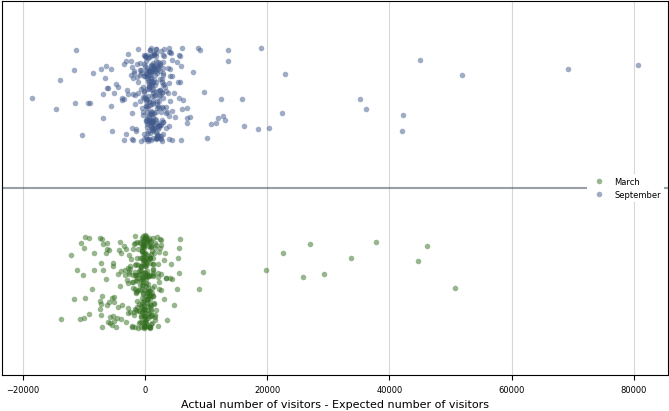

In [530]:
diff_march = actual_visitors_march - expected_visitors_march
diff_september = actual_visitors_september - expected_visitors_september

fig, ax = plt.subplots()
np.random.seed(1)
u_m = np.random.rand(len(diff_march))
u_s = np.random.rand(len(diff_september))

ax.plot(diff_march, 0.5 * u_m, "o", label='March', color=rgb.tue_darkgreen, alpha=0.5, mec="none", ms=4)
ax.plot(diff_september, 1 + 0.5 * u_s, "o", label='September', color=rgb.tue_darkblue, alpha=0.5, mec="none", ms=4)
ax.yaxis.set_visible(False)
ax.set_ylim(-0.25, 1.75)
ax.axhline(0.75, color=rgb.tue_dark, alpha=0.5)
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(True, alpha=0.5)
ax.set_xlabel('Actual number of visitors - Expected number of visitors')
plt.show()

The data for March is centred around zero, indicating the effectiveness of our method. Assuming similar visitor numbers for February, March and April, we can estimate the number of visitors for March by calculating the average of February and April. In September, there seems to be a shift towards the right. To examine this more closely, we will zoom in on the region [-10000, 15000]. 

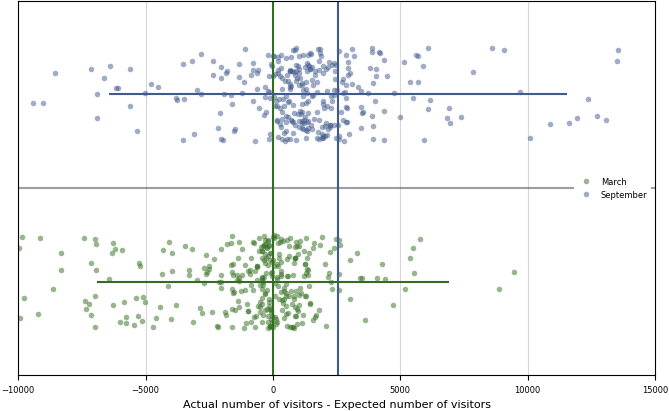

In [531]:
fig, ax = plt.subplots()
ax.plot(diff_march, 0.5 * u_m, "o", label='March', color=rgb.tue_darkgreen, alpha=0.5, mec="none", ms=4)
ax.plot(diff_september, 1 + 0.5 * u_s, "o", label='September', color=rgb.tue_darkblue, alpha=0.5, mec="none", ms=4)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_xlim(-10000,15000)
ax.set_ylim(-0.25, 1.75)
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(True, alpha=0.5)
ax.set_xlabel('Actual number of visitors - Expected number of visitors')
# Plot the mean
ax.axvline(diff_march.mean(), color=rgb.tue_darkgreen)
ax.axvline(diff_september.mean(), color=rgb.tue_darkblue)
# Add error bars for the means
ax.errorbar(x=[diff_march.mean()], y=[0.25], xerr=[diff_march.std()], color=rgb.tue_darkgreen)
ax.errorbar(x=[diff_september.mean()], y=[1.25], xerr=[diff_september.std()], color=rgb.tue_darkblue)

plt.show()